## Sales Dashboard

Create a dashboard that visualizes sales data. Use Pandas to process the data and Matplotlib/Seaborn to create bar plots, line graphs, and pie charts showing sales trends, product performance, and other key metrics.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# https://www.kaggle.com/datasets/shreyanshverma27/online-sales-dataset-popular-marketplace-data

# Define the file path of the zip file
zip_file_path = 'Online Sales Dataset.zip'

# Step 1: Unzip the folder
# Create a directory to extract the contents
extracted_folder = 'online_sales_data'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List all files to understand what we have extracted
extracted_files = os.listdir(extracted_folder)
print("Extracted Files:", extracted_files)

# Step 2: Load the data
# Assuming the extracted files are CSVs, you can start by loading the main dataset
# Replace 'sales_data.csv' with the actual file name if it differs
main_file_name = [f for f in extracted_files if f.endswith('.csv')][0]
file_path = os.path.join(extracted_folder, main_file_name)

# Load the main dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# Quick preview of the data
print(df.head())

Extracted Files: ['Online Sales Data.csv']
   Transaction ID        Date Product Category             Product Name  \
0           10001  2024-01-01      Electronics            iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing         Levi's 501 Jeans   
3           10004  2024-01-04            Books        The Da Vinci Code   
4           10005  2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America    Credit Card  
1           1      499.99         499.99         Europe         PayPal  
2           3       69.99         209.97           Asia     Debit Card  
3           4       15.99          63.96  North America    Credit Card  
4           1       89.99          89.99         Europe         PayPal  


In [9]:
print("\nGeneral Info of the Dataset:")
df.info()  # Display info about columns, types, and non-null values

print("\nDescriptive Statistics:")
print(df.describe())  # Summary statistics for numerical columns


General Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB

Descriptive Statistics:
       Transaction ID  Units Sold   Unit Price  Total Revenue
count       240.00000  240.000000   240.000000     240.000000
mean      10120.50000    2.158333   236.395583     335.699375
std          69.42622    1.322454   429.446695     485.804469
min       100

In [11]:
# Clean Data

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Check the data types again to confirm the conversion
print("\nData Types after converting 'Date':")
print(df.dtypes)


Data Types after converting 'Date':
Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object


In [13]:
# Drop duplicate rows if any
print("\nNumber of Duplicate Rows before dropping:")
print(df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Check if duplicates were successfully removed
print("\nNumber of Duplicate Rows after dropping:")
print(df.duplicated().sum())


Number of Duplicate Rows before dropping:
0

Number of Duplicate Rows after dropping:
0


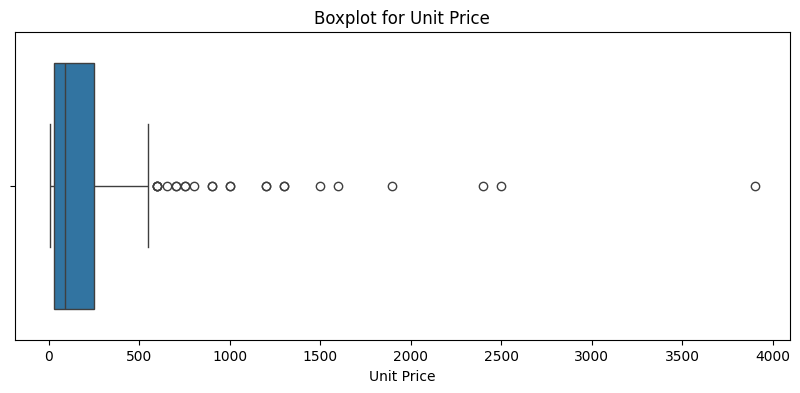

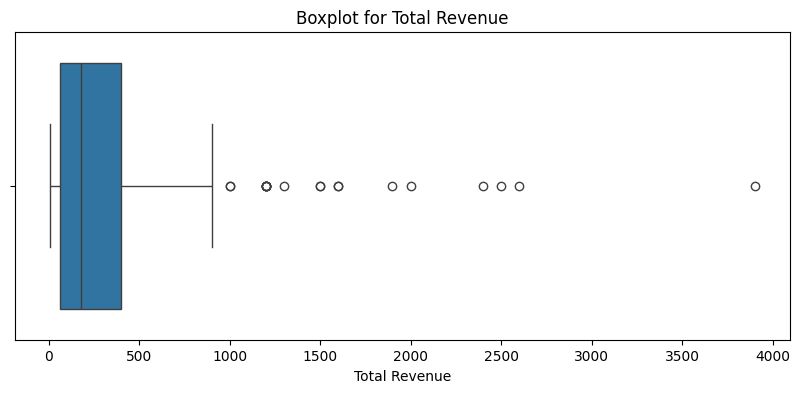

In [17]:
# Outlier Check

# Boxplot for Unit Price to identify outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Unit Price'])
plt.title('Boxplot for Unit Price')
plt.show()

# Boxplot for Total Revenue to identify outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Total Revenue'])
plt.title('Boxplot for Total Revenue')
plt.show()

In [15]:
# Prepare Data for Visualization

# Extracting Month and Year from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')

print("\nFirst few rows after extracting Year and Month:")
print(df.head())


First few rows after extracting Year and Month:
   Transaction ID       Date Product Category             Product Name  \
0           10001 2024-01-01      Electronics            iPhone 14 Pro   
1           10002 2024-01-02  Home Appliances         Dyson V11 Vacuum   
2           10003 2024-01-03         Clothing         Levi's 501 Jeans   
3           10004 2024-01-04            Books        The Da Vinci Code   
4           10005 2024-01-05  Beauty Products  Neutrogena Skincare Set   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  Year  \
0           2      999.99        1999.98  North America    Credit Card  2024   
1           1      499.99         499.99         Europe         PayPal  2024   
2           3       69.99         209.97           Asia     Debit Card  2024   
3           4       15.99          63.96  North America    Credit Card  2024   
4           1       89.99          89.99         Europe         PayPal  2024   

   Month Month_Name  
0  

In [19]:
# Group by Year and Month to see sales trends over time
monthly_sales = df.groupby(['Year', 'Month_Name'])['Total Revenue'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month_Name'])  # Sorting for proper timeline order

print("\nSales Trends Over Time (Year and Month):")
print(monthly_sales.head())


Sales Trends Over Time (Year and Month):
   Year Month_Name  Total Revenue
0  2024      April       12451.69
1  2024     August        7278.11
2  2024   February       10803.37
3  2024    January       14548.32
4  2024       July        6797.08


In [21]:
# Aggregating sales by Product Name
product_sales = df.groupby('Product Name')['Total Revenue'].sum().reset_index()
product_sales = product_sales.sort_values(by='Total Revenue', ascending=False)

print("\nTop Product Sales:")
print(product_sales.head())


Top Product Sales:
                  Product Name  Total Revenue
39         Canon EOS R5 Camera        3899.99
111                 LG OLED TV        2599.98
124        MacBook Pro 16-inch        2499.99
18   Apple MacBook Pro 16-inch        2399.00
230              iPhone 14 Pro        1999.98


In [23]:
# Aggregating sales by Region
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
region_sales = region_sales.sort_values(by='Total Revenue', ascending=False)

print("\nSales by Region:")
print(region_sales.head())


Sales by Region:
          Region  Total Revenue
2  North America       36844.34
0           Asia       22455.45
1         Europe       21268.06


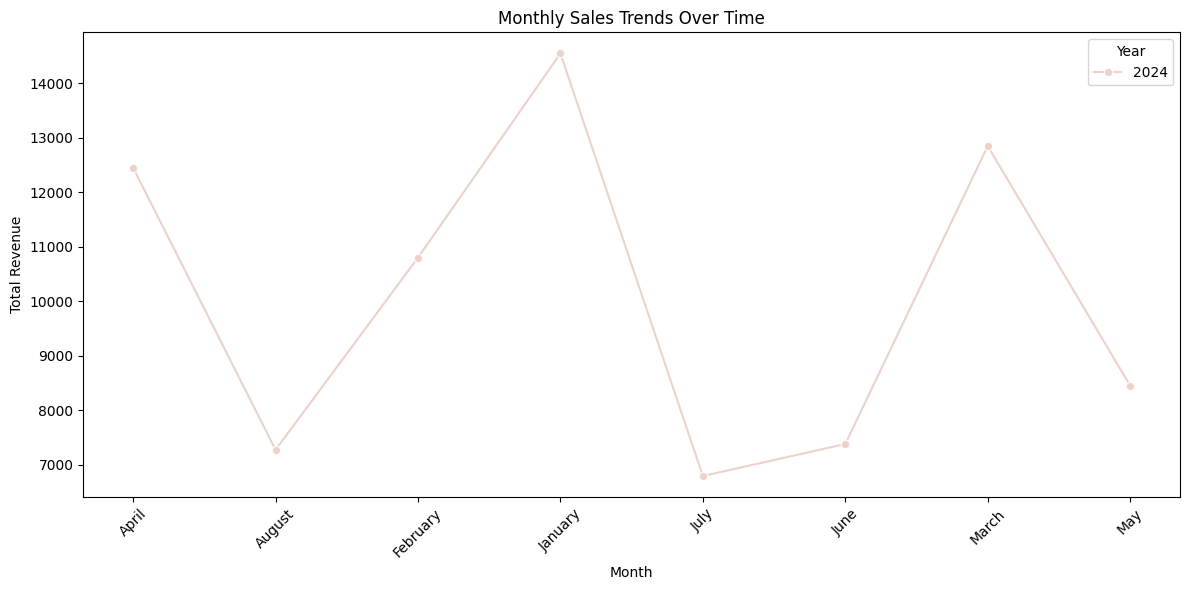

In [25]:
# Visualization with Matplotlib and Seaborn

# Line plot for sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Total Revenue', hue='Year', marker='o')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

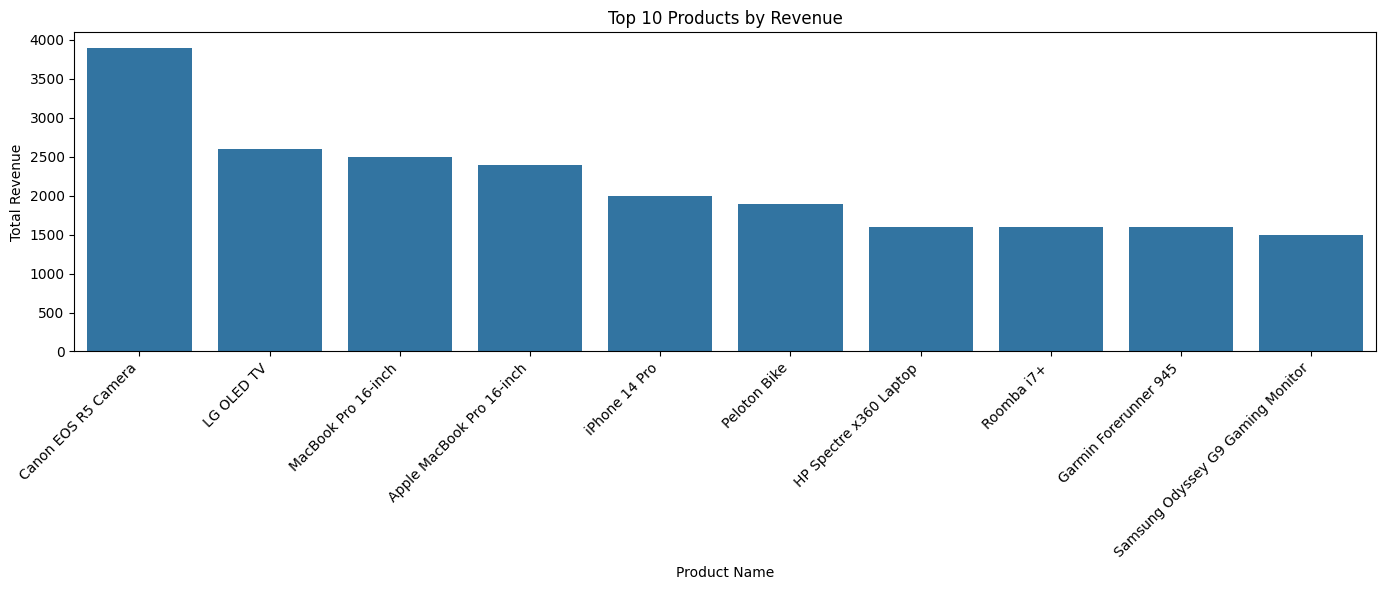

In [27]:
# Bar plot for top 10 products by revenue
plt.figure(figsize=(14, 6))
top_products = product_sales.head(10)
sns.barplot(data=top_products, x='Product Name', y='Total Revenue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

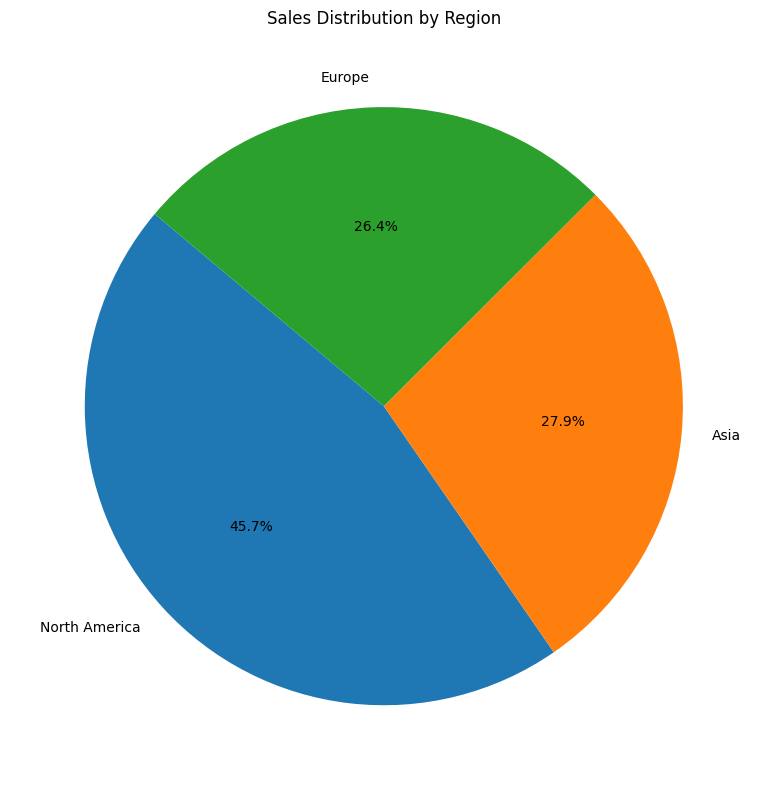

In [29]:
# Pie chart for regional sales distribution
plt.figure(figsize=(8, 8))
plt.pie(region_sales['Total Revenue'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.tight_layout()
plt.show()